# Iris Dataset - SOFENN Example

Demonstrate multi-class classification with SOFENN on classic Iris Dataset

In [1]:
import sys
sys.path.append("../src")

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

from sofenn.FuzzyNetwork import FuzzyNetworkModel
from sofenn.callbacks import InitializeFuzzyWeights

import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

## Read in and prep Iris Dataset

In [3]:
# read in iris dataset
iris = datasets.load_iris()
# create one-hot encoded vector for each class
Y = []
for y in iris.target:
    tmp = np.zeros(3)
    tmp[y] = 1
    Y.append(tmp)
Y = np.array(Y)
    
# split to train/test
X_train, X_test, y_train, y_test = train_test_split(iris.data, Y, test_size=0.1)

In [4]:
import pandas

In [5]:
features = pandas.DataFrame(iris.data, columns=iris.feature_names)
#features.to_csv(r'C:\Users\Andrew\PycharmProjects\sofenn\tests\unit\data/iris/features.csv', index=False)
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
target = pandas.DataFrame(Y, columns=iris.target_names)
#target.to_csv(r'C:\Users\Andrew\PycharmProjects\sofenn\tests\unit\data/iris/target.csv', index=False)
target.head()

,setosa,versicolor,virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [7]:
df = pandas.concat([pandas.DataFrame(iris.data), pandas.Series(iris.target)], axis=1)
df.columns = iris.feature_names + ['target']
#df.to_csv(r'C:\Users\Andrew\PycharmProjects\sofenn\tests\unit\data/iris.csv', index=False)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
#iris

In [9]:
X_train.shape

(135, 4)

In [10]:
fuzz = FuzzyNetworkModel(
            input_shape=X_train.shape,           # data attributes
            neurons=7, max_neurons=100,                 # initialization parameters
            prob_type='classification', target_classes=3
            )

In [12]:
fuzz.build(X_train.shape)
fuzz.summary()

C:\Users\Andrew\PycharmProjects\sofenn\venv39\lib\site-packages\keras\src\layers\layer.py:391: UserWarning: `build()` was called on layer 'FuzzyNetwork', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "FuzzyNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ FuzzyRules (FuzzyLayer)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Normalize (NormalizeLayer)           │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Weights (WeightedLayer)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Outputs (OutputLayer)                │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Softmax (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
fuzz.compile()

Compiling model...


Model: "FuzzyNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ FuzzyRules (FuzzyLayer)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Normalize (NormalizeLayer)           │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Weights (WeightedLayer)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Outputs (OutputLayer)                │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Softmax (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [14]:
fuzz.get_layer("FuzzyRules")

<FuzzyLayer name=FuzzyRules, built=True>

In [15]:
#fuzz.get_layer("FuzzyRules").build(input_shape=X_train.shape)
fuzz.get_layer("FuzzyRules").get_weights()

[array([[ 0.04664383,  0.03719908,  0.01159799,  0.03815626,  0.01369477,
          0.00362255,  0.01304307],
        [-0.01197077, -0.04496747,  0.03636773, -0.00750246, -0.02670994,
         -0.00073197,  0.02941075],
        [-0.04823735, -0.03353869, -0.00542552, -0.01751231, -0.04298512,
          0.0494825 ,  0.02896592],
        [-0.00800874,  0.04422906, -0.03496441,  0.01167303, -0.03368807,
         -0.04265975, -0.01285869]], dtype=float32),
 array([[1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1.]], dtype=float32)]

In [16]:
fuzz.summary()

Model: "FuzzyNetwork"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ FuzzyRules (FuzzyLayer)              │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Normalize (NormalizeLayer)           │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Weights (WeightedLayer)              │ (None, 7)                   │              35 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Outputs (OutputLayer)                │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Softmax (Dense)                      │ (None, 3)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 97 (388.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

In [50]:
fuzz.fit(X_train, y_train, 
         callbacks=[InitializeFuzzyWeights(sample_data=X_train)],
         epochs=10, verbose=1, batch_size=16)

Initializing Fuzzy Weights prior to training...
params attribute: {'verbose': 1, 'epochs': 10, 'steps': 9}
Model Status: True
Fuzzy rules layer Status: <FuzzyLayer name=FuzzyRules, built=True>
Fuzzy rules weights: [array([[ 0.1852978 , -0.06692757,  0.41674015, -0.1280665 ,  0.03160814,
        -0.13396136, -0.11608303],
       [ 0.07976222, -0.21028274,  0.4810743 , -0.24120179, -0.0643038 ,
        -0.13919327, -0.07391217],
       [ 0.06267672, -0.07760538,  0.00053941, -0.02101199, -0.01258098,
        -0.06530761, -0.09233549],
       [-0.02957494, -0.01814362, -0.16592108,  0.19052196, -0.09250215,
        -0.14314266, -0.11733343]], dtype=float32), array([[1.0525585 , 0.9002133 , 1.3032013 , 0.9599067 , 0.98449385,
        0.86663306, 0.8744535 ],
       [0.9834652 , 0.8046675 , 1.3953464 , 0.8202076 , 0.8853921 ,
        0.87004143, 0.92390394],
       [0.895553  , 0.9321227 , 0.6205385 , 1.225875  , 0.91152495,
        0.9096337 , 0.9017617 ],
       [0.59433943, 0.8535599 , 0

In [18]:
c, s = fuzz.get_layer("FuzzyRules").get_weights()

In [19]:
c.shape

(4, 7)

In [20]:
s.shape

(4, 7)

In [18]:
# new
fuzz.fit(X_train, 
         y_train,     
         init_c=True,
         random_sample=True,
         init_s=True,
         s_0=4.0,
         epochs=10, verbose=1, batch_size=16)

TypeError: fit() got an unexpected keyword argument 'init_c'

In [ ]:
# new
fuzz.fit(X_train, 
         y_train,     
         init_c=False,
         random_sample=True,
         init_s=False,
         s_0=4.0,
         epochs=10, verbose=1, batch_size=16)

In [ ]:
# fuzz.compile(
#     init_c=False,
#     sample_data=X_train,
#     random_sample=True,
#     init_s=False,
#     s_0=4.0
# )

In [ ]:
# # NEW
# fuzz = FuzzyNetworkModel(
#             input_shape=(4,),          # data attributes
#             neurons=5, max_neurons=100,                 # initialization parameters
#             problem_type='classification',
#             )

In [ ]:
fuzz.build(input_shape=X_train.shape)

In [ ]:
fuzz.get_layer("FuzzyRules").get_weights()

In [19]:
fuzz.compile(
    init_c=True,
    sample_data=X_train,
    random_sample=True,
    init_s=True,
    s_0=4.0
)

Compiling model...


TypeError: compile() got an unexpected keyword argument 'init_c'

In [20]:
fuzz.get_layer('FuzzyRules').get_weights()

[array([[5.6267214 , 6.814352  , 4.8489995 , 4.855015  , 7.259321  ,
         6.8615155 , 4.905853  ],
        [2.104066  , 2.9186497 , 3.3821993 , 3.662844  , 2.940587  ,
         2.8974903 , 3.5053458 ],
        [4.162252  , 4.855904  , 1.0359414 , 1.3450888 , 6.045792  ,
         4.898224  , 1.4864742 ],
        [1.4660872 , 1.6558231 , 0.03724612, 0.04885532, 2.2501423 ,
         1.6955307 , 0.28622863]], dtype=float32),
 array([[3.8256128, 3.8558068, 3.868494 , 3.9708881, 3.8523343, 3.8051116,
         3.8280616],
        [3.8163478, 3.9250364, 3.9498463, 3.9395463, 3.8885937, 3.8785498,
         3.8485363],
        [3.8212924, 3.83252  , 3.8320253, 3.9533918, 3.8856623, 3.7876756,
         3.7912889],
        [3.8171506, 3.8303099, 3.8361657, 3.957596 , 3.878203 , 3.7847621,
         3.794707 ]], dtype=float32)]

In [21]:
fuzz.get_layer("FuzzyRules").get_weights()

[array([[5.6267214 , 6.814352  , 4.8489995 , 4.855015  , 7.259321  ,
         6.8615155 , 4.905853  ],
        [2.104066  , 2.9186497 , 3.3821993 , 3.662844  , 2.940587  ,
         2.8974903 , 3.5053458 ],
        [4.162252  , 4.855904  , 1.0359414 , 1.3450888 , 6.045792  ,
         4.898224  , 1.4864742 ],
        [1.4660872 , 1.6558231 , 0.03724612, 0.04885532, 2.2501423 ,
         1.6955307 , 0.28622863]], dtype=float32),
 array([[3.8256128, 3.8558068, 3.868494 , 3.9708881, 3.8523343, 3.8051116,
         3.8280616],
        [3.8163478, 3.9250364, 3.9498463, 3.9395463, 3.8885937, 3.8785498,
         3.8485363],
        [3.8212924, 3.83252  , 3.8320253, 3.9533918, 3.8856623, 3.7876756,
         3.7912889],
        [3.8171506, 3.8303099, 3.8361657, 3.957596 , 3.878203 , 3.7847621,
         3.794707 ]], dtype=float32)]

In [22]:
# new
fuzz.fit(X_train, y_train, epochs=10, verbose=1, batch_size=16)

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.6252 - loss: 3.9538
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.6029 - loss: 3.8457
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.6674 - loss: 3.6605  
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - categorical_accuracy: 0.5915 - loss: 3.7731
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - categorical_accuracy: 0.6212 - loss: 3.5597
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.6300 - loss: 3.6409
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.6500 - loss: 3.5354  
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.6448 - loss: 3.4195
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - categorical_accuracy: 0.5659 - loss: 3.5918
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.4129 - loss: 3.3049


In [23]:
fr = fuzz.get_layer("FuzzyRules")
fr.set_weights([(10,3), (100, 5)])

AttributeError: 'tuple' object has no attribute 'shape'

In [51]:
fuzz.get_layer_weights('FuzzyRules')

[array([[ 0.18654029, -0.06728998,  0.41975296, -0.12931663,  0.03197613,
         -0.1342825 , -0.11645992],
        [ 0.0809275 , -0.21063471,  0.48367006, -0.242466  , -0.06386797,
         -0.13955404, -0.07429974],
        [ 0.06347253, -0.07796696,  0.00389573, -0.02171253, -0.01216263,
         -0.06561074, -0.09269167],
        [-0.02836987, -0.01858542, -0.16298454,  0.18973055, -0.0923695 ,
         -0.14345822, -0.11769667]], dtype=float32),
 array([[1.0530336 , 0.8998288 , 1.3054264 , 0.9594689 , 0.98466134,
         0.8662829 , 0.87405384],
        [0.9843292 , 0.8043324 , 1.3969493 , 0.8193323 , 0.8858637 ,
         0.8696212 , 0.92349815],
        [0.8949707 , 0.93175846, 0.6202154 , 1.2265453 , 0.9117059 ,
         0.9092995 , 0.901371  ],
        [0.59433913, 0.85311896, 0.46755373, 1.4415593 , 0.7042923 ,
         0.94814926, 0.9474338 ]], dtype=float32)]

In [52]:
X_test

array([[5.6, 2.9, 3.6, 1.3],
       [5. , 3. , 1.6, 0.2],
       [6.4, 2.7, 5.3, 1.9],
       [5.7, 3.8, 1.7, 0.3],
       [6.7, 3.3, 5.7, 2.5],
       [5.7, 2.8, 4.5, 1.3],
       [4.4, 3. , 1.3, 0.2],
       [7.2, 3. , 5.8, 1.6],
       [4.9, 3.1, 1.5, 0.2],
       [5.7, 2.5, 5. , 2. ],
       [4.8, 3.1, 1.6, 0.2],
       [7.6, 3. , 6.6, 2.1],
       [5.8, 2.7, 5.1, 1.9],
       [5.8, 4. , 1.2, 0.2],
       [5.1, 3.7, 1.5, 0.4]])

In [53]:
y_test

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [54]:
y_pred = fuzz.predict(X_test)
y_pred.round()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [55]:
acc = y_test == y_pred.round()
acc

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [56]:
acc.sum() / acc.size

1.0

## Model Prediction Results

In [57]:
pred_loss, pred_bin_acc = fuzz.evaluate(X_test, y_test)
print('Model Loss: {:0.8f}'.format(pred_loss))
print('Binary Accuracy: {:2.1f}%'.format(100*pred_bin_acc))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - categorical_accuracy: 1.0000 - loss: 0.1150
Model Loss: 0.11501791
Binary Accuracy: 100.0%


In [58]:
fuzz.metrics_names

['loss', 'compile_metrics']

## Plot Results

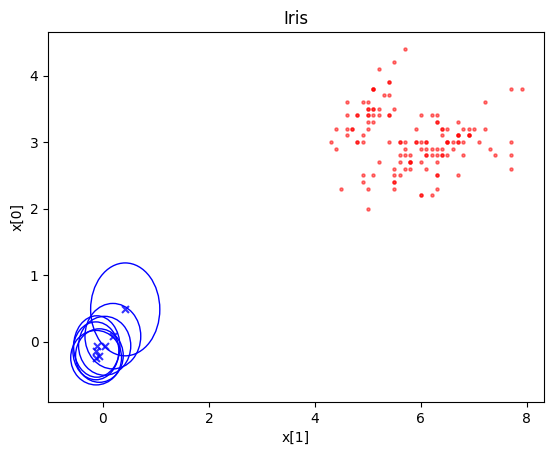

In [59]:
w = fuzz.get_layer_weights('FuzzyRules')


plt.clf()
plt.title('Iris')
plt.ylabel('x[0]')
plt.xlabel('x[1]')
plt.scatter([a[0] for a in X_train], [a[1] for a in X_train], color='r', alpha=0.5, s=5)
for i in range(0,fuzz.neurons):
    ellipse = Ellipse((w[0][0][i], w[0][1][i]), w[1][0][i],w[1][1][i], color='b', fill=False)
    ax = plt.gca()
    ax.add_patch(ellipse)

plt.scatter(w[0][0], w[0][1], color='b', alpha=0.8, s=25, marker='x')
plt.show()